# COMPUTER VISION!
Author: Ashton Doane <br>

This notebook shows the steps that have gone into using computer vision for this project. We namely implemented 4 features:

1. <b>Image capture </b> - Processing images using open-cv and AUKEY camera.
2. <b>Image Filtering</b> - Smoothing out images using filtering methods such as median or gaussian filters.
3. <b>Edge Detection and Processing </b> - Using canny edge detection and radon/hough transform to develop shapes on the map.
4. <b>Thymio Pose Detection</b> - Detecting the location of the Thymio using pattern matching

### 1. Installs for all required elements:

In [113]:
!python3 -m pip install --upgrade tdmclient
!python3 -m pip install --upgrade opencv-python
!python3 -m pip install --upgrade numpy
!python3 -m pip install --upgrade matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
  Using cached numpy-2.1.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pennylane 0.39.0 requires numpy<2.1, but you have numpy 2.1.3 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pi

### 2. Import and Setup

In [114]:
import cv2 # used for image processing
import numpy as np # used for array manipulation in conjuction with
import matplotlib.pyplot as plt # used for displaying processing steps for your aid!

### 3. Thymio Vision Class

In [ ]:
class ThymioVision:
    @staticmethod
    def calibrateCameraPos():
        """
        Position the camera such that it aligns with the corners of A0 paper as shown. This
        is purely for user setup, and does not return a value. If dots are aligned with the corners of
        A0 paper, ensures that 1 px = 0.9344 mm
        """
        cv2.namedWindow("Camera Calibration") 
        vc = cv2.VideoCapture(0)
        ret = True
        while True:
            ret, frame = vc.read()
            if not ret:
                break
            
            # add calibration circles to frame
            cv2.circle(frame, (360, 90), 5, (0, 0, 255), 5)
            cv2.circle(frame, (frame.shape[1]-360, 90), 5, (0, 0, 255), 5)
            cv2.circle(frame, (360, frame.shape[0]-90), 5, (0, 0, 255), 5)
            cv2.circle(frame, (frame.shape[1]-360, frame.shape[0]-90), 5, (0, 0, 255), 5)

            cv2.imshow("Camera Calibration", frame)
            key = cv2.waitKey(50)
            if key == ord('c'): # Escape and return image on c
                break
        
        vc.release()
        cv2.destroyAllWindows()

    @staticmethod
    def captureImageOnCommand():
        """
        Provides the user with a camera feed, from which the user may input 'C' to
        capture the image provided. Does not complete without user input.
        @param cv2 BGR image, from which we extract edges.
        @returns cv2 grayscale image with detected edges from input img.
        """
        cv2.namedWindow("Camera View")
        vc = cv2.VideoCapture(0)
        ret = True
        while True:
            ret, frame = vc.read()
            if not ret:
                break
            cv2.imshow("Camera View", frame)
            key = cv2.waitKey(50)
            if key == ord('c'): # Escape and return image on c
                break
        
        vc.release()
        cv2.destroyAllWindows()
        return frame

    # def captureImage():
    #     vc = cv2.VideoCapture(0)
    #     ret, frame = vc.read()
    #     vc.release()
    #     return frame

    @staticmethod
    def getEdges(img, filter = 'median', edge_method = 'canny', verbose=False):
        """
        Extract detected edges from a provided image.
        @param img(cv2 BGR_image): Image from which we extract edges.
        @param filter (string): Indication of what type of filter to overlay on the image.
        @param edge_method (string): Indication of what type of edge detection method should be used.
        @param verbose (bool): If true, will display each step of the processing.
        @returns cv2 grayscale image with detected edges from input img.
        """
        # First, convert the input image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply the selected filter
        if filter == 'median':
            filtered_img =  cv2.medianBlur(gray_img, 31)
        elif filter == 'average':
            pass
        elif filter == 'gaussian':
            pass
        else:
            filtered_img = gray_img

        #Apply the selected edge detection method to the filtered image
        if edge_method == 'canny':
            edges = cv2.Canny(filtered_img, 100,200)
        else:
            pass

        final_img = np.zeros(shape=edges.shape)
        for i, row in enumerate(edges):
            for j, pixel in enumerate(row):
                if pixel == 255:
                    cv2.circle(final_img, (j,i), 5, 255)

        # If verbose selected, Display images
        if verbose:
            # Set up plot size
            plt.rcParams["figure.figsize"] = (20,5)
            plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.4)
            # plt.tick_params(
            #     axis='x',          # changes apply to the x-axis
            #     which='both',      # both major and minor ticks are affected
            #     bottom=False,      # ticks along the bottom edge are off
            #     top=False,         # ticks along the top edge are off
            #     labelbottom=False
            # )
            # plt.tick_params(
            #     axis='y',          # changes apply to the x-axis
            #     which='both',      # both major and minor ticks are affected
            #     bottom=False,      # ticks along the bottom edge are off
            #     top=False,         # ticks along the top edge are off
            #     labelbottom=False
            # )
            
            #Grayscaled Image:
            plt.subplot(1, 3, 1)
            plt.title("Grayscale")
            plt.imshow(gray_img, cmap='gray')

            #Filtered Image:
            plt.subplot(1, 3, 2)
            plt.title("Filtered: " + filter)
            plt.imshow(filtered_img, cmap='gray')

            #Edges + expansion radius Image:
            plt.subplot(1, 3, 3)
            plt.title("Edges: " + edge_method)
            plt.imshow(final_img, cmap='gray')

            plt.show()
            
        return edges

    @staticmethod
    def pixelToRealSpace(position):
        """
        Converts a pixel location to a dimension in real space. Coordinate frame centered on the top left corner of the paper.
        As the setup always ensures alignment of the camera to the corners of A0 paper, the ratio is set.
        @param position (x,y): Pixel location on the camera image.
        @returns (x,y) tuple of location in real space in cm.
        """
        # Camera shape (1080, 1920, 3)
        # Paper dimensions (841 x 1189)
        # Alignment from calibration such that 1 px = 0.9344 mm
        return (position[0]*0.9344*10, position[1]*0.9344*10)

    #TODO: ADD VISUALIZATION OF STEPS
    @staticmethod
    def detectBlueDot(frame, divisions=3, method = 'TM_CCORR_NORMED', templatePath = "Templates/blueDot2.png", verbose=False):
        """
        Note: Does NOT support TM_SQDIFF or SQDIFF_NORMED
        """
        template = cv2.imread(templatePath) #read template as bgr image
        globalMax = 0
        best_approx = ([], 0, 0, 0) #pos/w/h/scale
        
        # resize the template image to a variety of scales, perform matching 
        for scale in np.linspace(0.1, 2.0, divisions)[::-1]:
            resized = cv2.resize(frame, (0,0), fx=scale, fy=scale) #resize copy
            
            # get effective size of rectangle bounding box we are searching
            w, h, c = template.shape
            w = int(w/scale)
            h = int(h/scale)

            meth = getattr(cv2, method)

            # Apply template Matching
            res = cv2.matchTemplate(resized,template,meth)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        
            if  max_val > globalMax:
                globalMax = max_val
                best_approx = ([int(max_loc[0]/scale), int(max_loc[1]/scale)], w, h, scale)


        top_left,w,h,scale = best_approx
        bottom_right = (top_left[0] + w, top_left[1] + h)

        if verbose:
            copy = frame.copy()
            cv2.rectangle(copy, top_left, bottom_right, (255, 50, 255), 5)
            plt.subplot(122),plt.imshow(copy,cmap = 'gray')
            plt.show()
        
        x = top_left[0] + int(w/2)
        y = top_left[1] + int(h/2)
        return (x,y) #return center of box
    
    @staticmethod
    def detectGoal(frame, divisions=4, method = 'TM_CCORR_NORMED', templatePath = "Templates/greenDot2.png", verbose=False):
        """
        Note: Does NOT support TM_SQDIFF or SQDIFF_NORMED
        """
        template = cv2.imread(templatePath) #read template as bgr image
        globalMax = 0
        best_approx = ([], 0, 0, 0) #pos/w/h/scale
        
        # resize the template image to a variety of scales, perform matching 
        for scale in np.linspace(0.5, 2, divisions)[::-1]:
            resized = cv2.resize(frame, (0,0), fx=scale, fy=scale) #resize copy
            
            # get effective size of rectangle bounding box we are searching
            w, h, c = template.shape
            w = int(w/scale)
            h = int(h/scale)

            meth = getattr(cv2, method)

            # Apply template Matching
            res = cv2.matchTemplate(resized,template,meth)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        
            if  max_val > globalMax:
                globalMax = max_val
                best_approx = ([int(max_loc[0]/scale), int(max_loc[1]/scale)], w, h, scale)


        top_left,w,h,scale = best_approx
        bottom_right = (top_left[0] + w, top_left[1] + h)

        if verbose:
            copy = frame.copy()
            cv2.rectangle(copy, top_left, bottom_right, (255, 50, 255), 5)
            plt.subplot(122),plt.imshow(copy,cmap = 'gray')
            plt.show()
        
        x = top_left[0] + int(w/2)
        y = top_left[1] + int(h/2)
        return (x,y) #return center of box
    
    @staticmethod
    def detectOrangeHeading(frame, reduction = 0.1, THRESHOLD = 25, verbose = False):
        lower_quality = cv2.resize(frame, (0,0), fx = reduction, fy = reduction) # rescale for faster processing
        # Create a mask that looks for only the light indicator for position
        hsv = cv2.cvtColor(lower_quality, cv2.COLOR_BGR2HSV) #convert to hsv for masking
        lower_orange = np.array([0, 0, 230]) # hue/saturation/brightness
        upper_orange = np.array([180, 255, 255]) 
        mask = cv2.inRange(hsv, lower_orange, upper_orange)
        result = cv2.bitwise_and(lower_quality, lower_quality, mask=mask) # image correcting

        centerX = 0
        centerY = 0
        numDataPoints = 0
        for i, row in enumerate(result):
            for j, pixel in enumerate(row):
                if pixel.any() != 0:
                    centerX += j
                    centerY += i
                    numDataPoints += 1
        if numDataPoints < THRESHOLD:
            if verbose: 
                print("Orange not found")
            return (None, None)
        centerX = int(centerX/numDataPoints/reduction) # find average and rescale to full value
        centerY = int(centerY/numDataPoints/reduction)
        
        # If verbose, display each step of processing
        if verbose:
            plt.subplot(121), plt.imshow(result)
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.subplot(122), plt.imshow(rgb)
            plt.plot([centerX], [centerY], 'o')
            plt.show()
        pass

        return (centerX, centerY)
                
            
    @staticmethod
    def getThymioPose(frame):
        """
        Extracts the Thymio pose from a camera feed and returns as a triple of (x,y,theta), relative to the top-left corner of the camera.
        @param frame (np.array): BGR cv2 image to extract position from.
        @returns 
        """
        blueX, blueY = ThymioVision.detectBlueDot(frame)
        orangeX, orangeY = ThymioVision.detectOrangeHeading(frame)

        if blueX is None or orangeX is None:
            return (None, None, None, None, None)
        dx = float(orangeX-blueX)
        dy = -float(orangeY-blueY)
        theta = np.arctan2(dy,dx)

        return (blueX, blueY, theta)

    @staticmethod 
    def getMap():
        """
        Takes Leverages findEdges, getThymioPos and detectGoal to build a map, removing any edges that the Thymio is contributing.
        
        """
        # Get edge list
        # Find thymio
        # Remove edges within the radius of the thymio
        # Find goal
        # Mark goal on map and return (map, status) --> status indicates if any step failed i.e. no goal, no thymio, etc...
        pass


### 4. Applying this class

In [116]:
# First apply the calibration filter in order to align the camera
ThymioVision.calibrateCameraPos()

In [248]:
frame = ThymioVision.captureImageOnCommand()

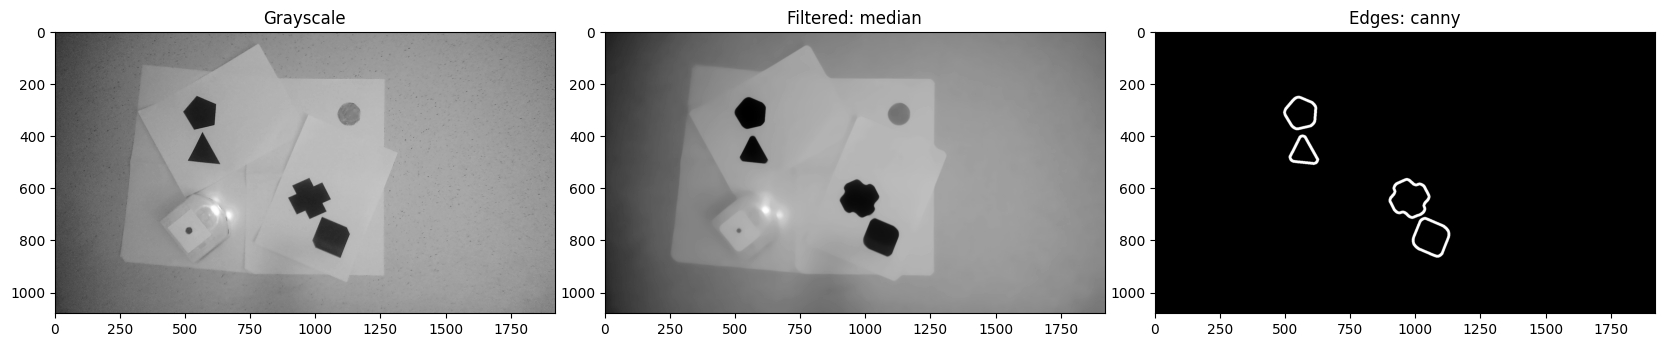

In [249]:
# Next, procure edges from camera capture 
img = ThymioVision.getEdges(frame, verbose=True)

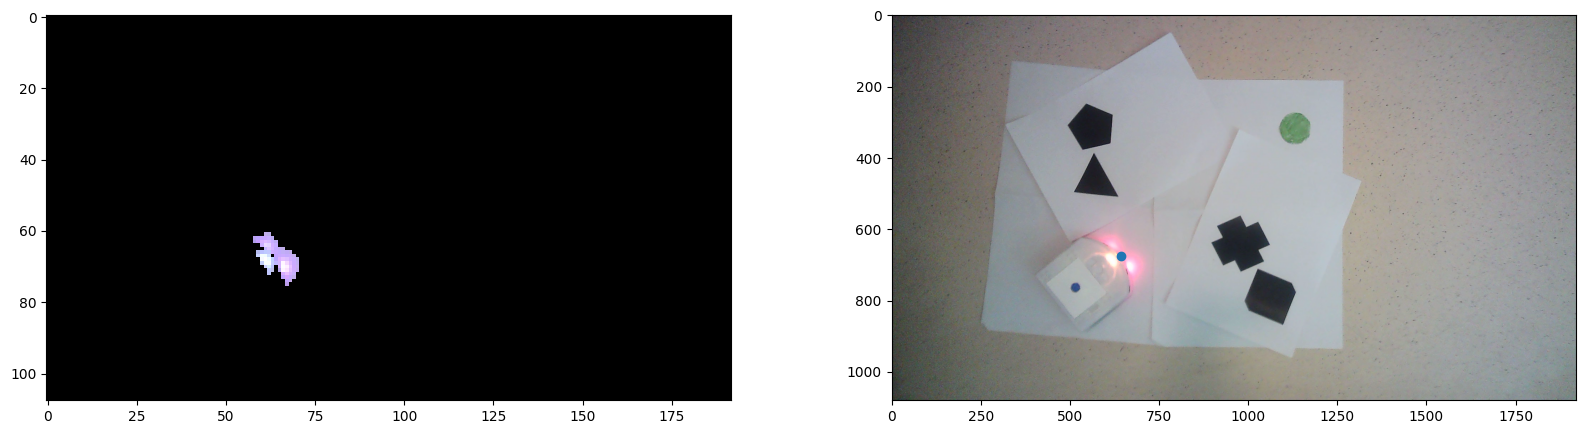

(642, 675)

In [250]:
# Test color matching from image to locate thymio
ThymioVision.detectOrangeHeading(frame, verbose=True, reduction=0.1)

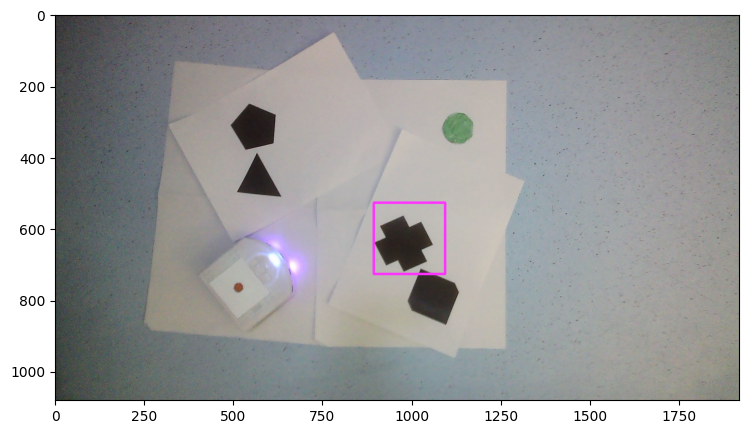

(993, 626)

In [254]:
ThymioVision.detectBlueDot(frame, verbose=True)

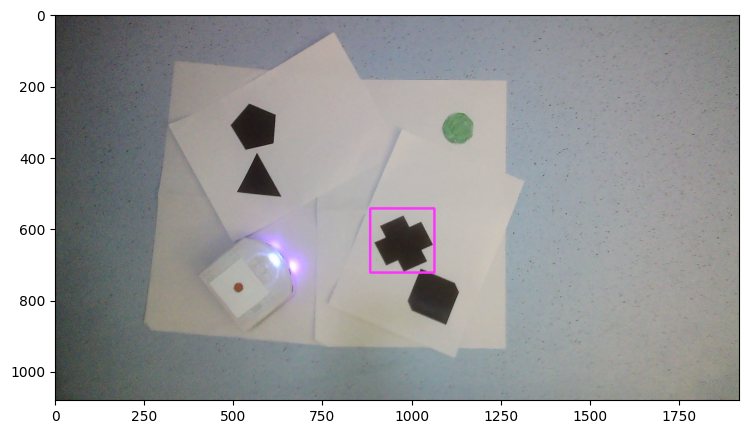

(973, 632)

In [252]:
ThymioVision.detectGoal(frame, verbose=True)

In [247]:
# Live example of Thymio tracking
cv2.namedWindow("Camera View")
vc = cv2.VideoCapture(0)
while True:
    ret, frame = vc.read()
    if ret:
        x1, y1, x2, y2 = ThymioVision.getThymioPose(frame)
        cv2.circle(frame, (x1,y1), 5, (0,255,255), 3)
        cv2.circle(frame, (x2,y2), 5, (255,0,255), 3)
        # x1, y1 = ThymioVision.detectGoal(frame)
        # cv2.circle(frame, (x1,y1), 5, (0,255,255), 3)
        cv2.imshow("Camera View", frame)
    key = cv2.waitKey(50)
    if key == ord('c'): # Escape and return image on c
        break

vc.release()
cv2.destroyAllWindows()